As there are a few approach on how we can apply Machine Learning to physics experiment data process.

Firstly from low level data such as the raw data itself from experiment apparatus itself.

Secondly is from reconstructed parameters where majority of physics experiment for the ease of analysis and protability of the physics data itself. Raw data itself are vary large and not practical for analysis on a laptop. A shrink down version of the raw data itself into reconstructed parameters can be easily analysis from a laptop with internet connections.

# Clustering Analysis - A Form of Unsupervised training

An algorithm where the data sort itself into groups based on the distribution of the data.

## Lets attempt to build this :D

As we do know which type of analysis preform the best for clsutering the type of data we have, we will explore a few options that are available within python framework libraries

# K-means Analysis studies

Sckit Learn K-means

(41259,)
(41259, 1)
(41259, 8)


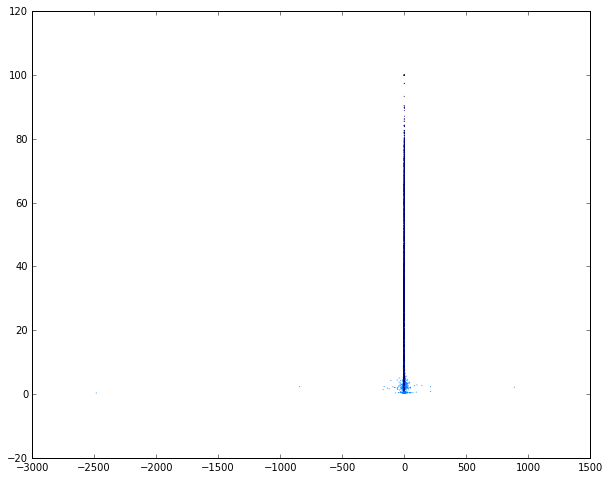

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

plt.rcParams['figure.figsize'] = (10.0, 8.0)

from root_pandas import read_root

# length = 34

RefPulse = read_root("RefPulse.root","tree",columns=["PSDPara"],flatten=["PSDPara"])
lr,hr = RefPulse.shape
lr=int(lr/31)

alpha = read_root("Alpha_11.root","tree",columns=["PSDPara"],flatten=["PSDPara"])
la,ha = alpha.shape
la=int(la/31)

cat = read_root("Run009-230-001.root","tree",columns=["PSDPara"],flatten=["PSDPara"])
l,h = cat.shape
l=int(l/34)

energy = read_root("Run009-230-001.root","tree",columns=["Energy"],flatten=["Energy"])
le,he = energy.shape
le = int(le/3)

ratio4us = read_root("Run009-230-001.root","tree",columns=["Ratio4us"])
Refratio4us = read_root("RefPulse.root","tree",columns=["Ratio4us"])
Aratio4us = read_root("Alpha_11.root","tree",columns=["Ratio4us"])
# print(ratio4us.values)

def normalized_PSD(x,n,l):
    y = x.PSDPara.values.reshape(n,l)
    return y

def normalized_Energy(x,n,l):
    y = x.Energy.values.reshape(n,l)
    return y

CAT = normalized_PSD(cat,l,34)
Energy = normalized_Energy(energy,le,3)

print(CAT[:,1].shape)
print(ratio4us.values.shape)

PSDPara1 = np.expand_dims(CAT[:,1],axis=1)
PSDPara4 = np.expand_dims(CAT[:,4],axis=1)
PSDPara7 = np.expand_dims(CAT[:,7],axis=1)
PSDPara10 = np.expand_dims(CAT[:,10],axis=1)
PSDPara13 = np.expand_dims(CAT[:,13],axis=1)
PSDPara18 = np.expand_dims(CAT[:,18],axis=1)
Energy1 = np.expand_dims(Energy[:,1],axis=1)

data = np.concatenate((ratio4us.values,Energy1,PSDPara1,PSDPara4,PSDPara7,PSDPara10,PSDPara13,PSDPara18),axis=1)
# dataRef = np.concatenate((Ref1,Refratio4us.values),axis=1)
# dataA = np.concatenate((A1,Aratio4us.values),axis=1)
print(data.shape)

# print(data)
kmeans = KMeans(n_clusters=5, random_state=1).fit(data)

dots = kmeans.cluster_centers_
label = kmeans.labels_

# print(dots)
# print(label[:100])

plt.figure()
plt.scatter(data[:,0],data[:,2],c=label,s=1,lw=0)
# plt.scatter(dots[:,0],dots[:,1],s=10,lw=0)
# plt.ylim(-1,10)
# plt.xlim()
plt.show()

# for i in range(8):
#     for j in range(8):
#         if i==j:
#             continue
#         else:
#             plt.figure()
#             plt.scatter(data[:,i],data[:,j],c=label,s=1,lw=0)
#             plt.show()
#             print("x=",i,"y=",j)


# plt.figure()
# plt.scatter(dataRef[:,0],dataRef[:,1],s=1,lw=0)
# plt.ylim(0.15,0.2)
# plt.show()

# plt.figure()
# plt.scatter(dataA[:,0],dataA[:,1],s=1,lw=0)
# plt.ylim(0,0.4)
# plt.show()

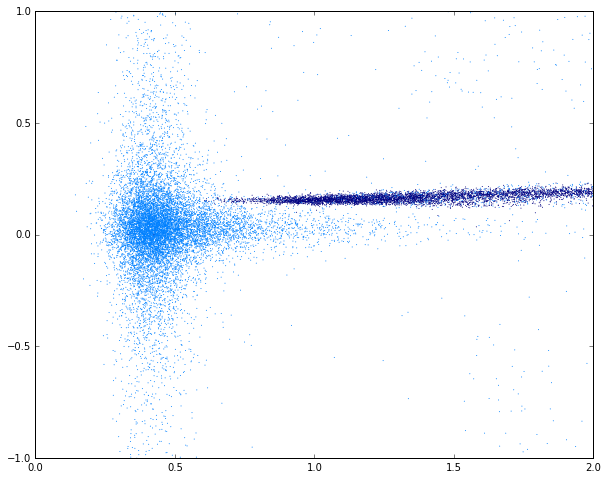

In [22]:
plt.figure()
plt.scatter(data[:,2],data[:,0],c=label,s=1,lw=0)
# plt.scatter(dots[:,0],dots[:,1],s=10,lw=0)
plt.ylim(-1,1)
plt.xlim(0,2)
plt.show()

# WORK IN PROGRESS

# Test different methodology beside K-means. Clustering analysis as a whole itself!